In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import cartopy.crs as ccrs
import cartopy.feature as cf

In [2]:
df = pd.read_csv('air_quality_ghana.csv')
df

,Temperature,Humidity,WindSpeed,Pressure,Rainfall,DateTime,Latitude,Longitude,PM2.5
0,29.490142,72.295862,4.749323,1005.264369,0.523149,2023-01-01 00:00:00,6.614418,0.321767,-269.81
1,27.585207,68.538915,5.220071,1007.141930,0.070887,2023-01-01 01:00:00,9.132039,-0.381285,-266.47
2,29.943066,57.804836,6.809763,1018.002070,4.234389,2023-01-01 02:00:00,9.809067,0.311513,-269.86
3,32.569090,89.325762,3.774596,1008.715529,1.840364,2023-01-01 03:00:00,5.680491,-3.305310,-271.12
4,27.297540,70.288741,5.553010,1006.765445,1.024282,2023-01-01 04:00:00,6.911117,0.685598,-261.93
...,...,...,...,...,...,...,...,...,...
495,29.616730,74.007039,3.983427,1012.032111,3.263437,2023-01-21 15:00:00,8.180174,-1.524224,-280.18
496,24.888262,70.930569,8.020081,1009.818071,4.063182,2023-01-21 16:00:00,6.533057,0.141854,-266.11
497,27.428984,77.635832,5.204803,1011.451951,5.660032,2023-01-21 17:00:00,8.753223,-1.770970,-269.82
498,25.373145,47.930255,4.452018,1011.558185,1.647812,2023-01-21 18:00:00,6.008118,-0.144534,-269.87


In [3]:
print('Info: ', df.info())
print('Describe: ', df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Humidity     500 non-null    float64
 2   WindSpeed    500 non-null    float64
 3   Pressure     500 non-null    float64
 4   Rainfall     500 non-null    float64
 5   DateTime     500 non-null    object 
 6   Latitude     500 non-null    float64
 7   Longitude    500 non-null    float64
 8   PM2.5        500 non-null    float64
dtypes: float64(8), object(1)
memory usage: 35.3+ KB
Info:  None
Describe:         Temperature    Humidity   WindSpeed     Pressure    Rainfall  \
count   500.000000  500.000000  500.000000   500.000000  500.000000   
mean     28.020514   65.047511    5.098194  1012.309905    3.055811   
std       2.943760   14.543620    1.496615     4.907705    3.059502   
min      18.276198   40.231601    0.655617   997.393248    0.000035   
25%

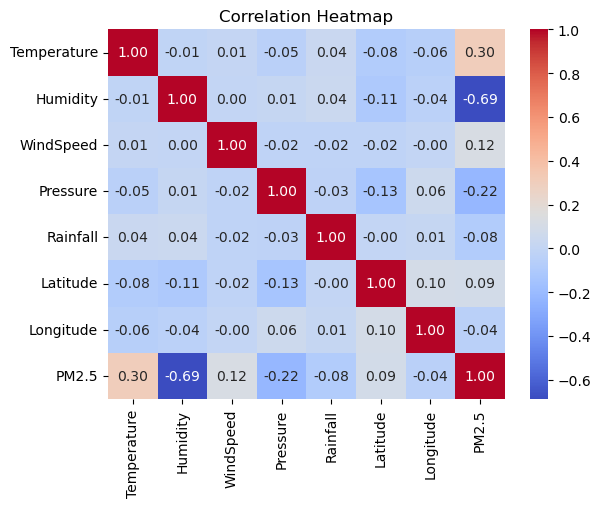

In [4]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Time'] = df['DateTime'].dt.hour
df

,Temperature,Humidity,WindSpeed,Pressure,Rainfall,DateTime,Latitude,Longitude,PM2.5,Time
0,29.490142,72.295862,4.749323,1005.264369,0.523149,2023-01-01 00:00:00,6.614418,0.321767,-269.81,0
1,27.585207,68.538915,5.220071,1007.141930,0.070887,2023-01-01 01:00:00,9.132039,-0.381285,-266.47,1
2,29.943066,57.804836,6.809763,1018.002070,4.234389,2023-01-01 02:00:00,9.809067,0.311513,-269.86,2
3,32.569090,89.325762,3.774596,1008.715529,1.840364,2023-01-01 03:00:00,5.680491,-3.305310,-271.12,3
4,27.297540,70.288741,5.553010,1006.765445,1.024282,2023-01-01 04:00:00,6.911117,0.685598,-261.93,4
...,...,...,...,...,...,...,...,...,...,...
495,29.616730,74.007039,3.983427,1012.032111,3.263437,2023-01-21 15:00:00,8.180174,-1.524224,-280.18,15
496,24.888262,70.930569,8.020081,1009.818071,4.063182,2023-01-21 16:00:00,6.533057,0.141854,-266.11,16
497,27.428984,77.635832,5.204803,1011.451951,5.660032,2023-01-21 17:00:00,8.753223,-1.770970,-269.82,17
498,25.373145,47.930255,4.452018,1011.558185,1.647812,2023-01-21 18:00:00,6.008118,-0.144534,-269.87,18


In [6]:
X = df.drop(columns=['PM2.5', 'DateTime', 'Latitude', 'Longitude','Time'])
y = df['PM2.5']

In [7]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=9)

In [9]:
def evaluation_models(model, name):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred, squared=False)
    r2 = r2_score(y_test, pred)
    
    return {'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2Score': r2}

In [10]:
models = [
    (LinearRegression(), 'Linear Regression'),
    (DecisionTreeRegressor(), 'DecisionTreeRegressor'),
    (RandomForestRegressor(), 'RandomForestRegressor'),
    (GradientBoostingRegressor(), 'GradientBoostingRegressor')
]

results = [evaluation_models(m, n) for m,n in models]
results = pd.DataFrame(results)
print(results)

                       Model       MAE      RMSE   R2Score
0          Linear Regression  4.297957  5.185061  0.596730
1      DecisionTreeRegressor  6.230400  7.624102  0.128103
2      RandomForestRegressor  4.672980  5.673786  0.517126
3  GradientBoostingRegressor  4.656874  5.676482  0.516667


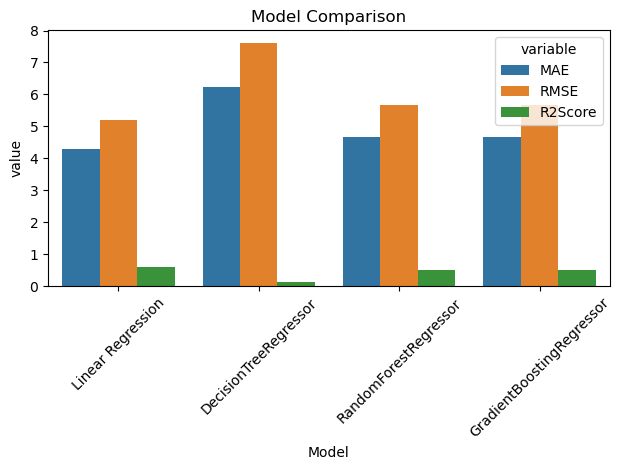

In [11]:
sns.barplot(data=results.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

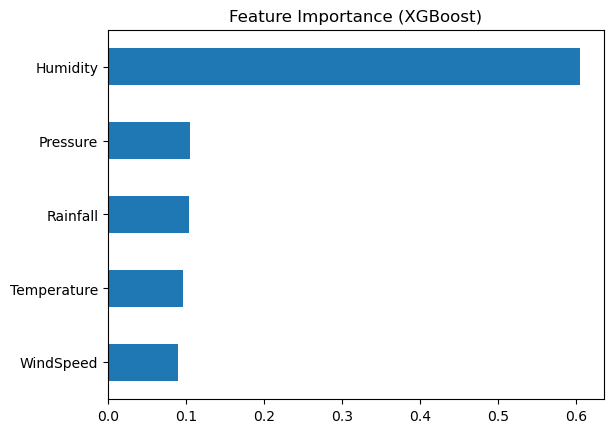

In [12]:
model = XGBRegressor()
model.fit(X_train, y_train)
importance = pd.Series(model.feature_importances_, index=df.drop(columns=['PM2.5','DateTime', 'Latitude', 'Longitude', 'Time']).columns)
importance.sort_values().plot(kind="barh")
plt.title("Feature Importance (XGBoost)")
plt.show()

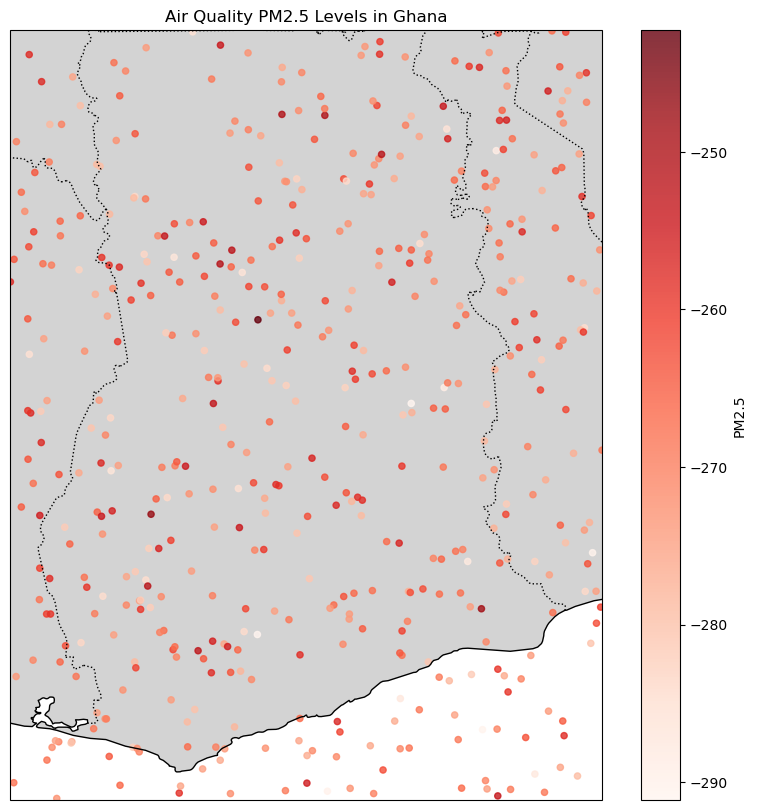

In [13]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-3.5, 1.5, 4.5, 11])
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS, linestyle=':')
ax.add_feature(cf.LAND, facecolor='lightgray')

pm = df['PM2.5']
sc = plt.scatter(df['Longitude'], df['Latitude'], c=pm, cmap='Reds', s=20, alpha=0.8, transform=ccrs.PlateCarree())
plt.colorbar(sc, label='PM2.5')
plt.title("Air Quality PM2.5 Levels in Ghana")
plt.show()